# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [22]:
# 1: Número de saudáveis

num_individuos = 303 
num_doentes = df.flag_doente.sum()

num_saudaveis = num_individuos - num_doentes
num_saudaveis

print(f"O número de pessoas saudáveis é de {num_saudaveis} pessoas")

O número de pessoas saudáveis é de 164 pessoas


In [23]:
# 1: 

num_doentes = df.flag_doente.sum()
num_doentes

139

In [24]:
# 1: Número de doentes

print(f"O número de pessoas doentes é de {num_doentes} pessoas")

O número de pessoas doentes é de 139 pessoas


In [25]:
# 1: Número de doentes

biv_doentes = pd.crosstab(df["sex"], df["flag_doente"], margins=True)
biv_doentes

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [26]:
# 1: 

print("Número de mulheres não doentes é igual a 72")
print("Número de mulheres doentes é igual a 25")
print("Número total de mulheres é igual a 97")
print("Número de homens não doentes é igual a 92")
print("Número de homens doentes é igual a 114")
print("Número total de homens é igual a 206")
print("Número total de pessoas não doentes é igual a 164")
print("Número total de pessoas doentes é igual a 139")
print("Número total de pessoas é igual a 303")

Número de mulheres não doentes é igual a 72
Número de mulheres doentes é igual a 25
Número total de mulheres é igual a 97
Número de homens não doentes é igual a 92
Número de homens doentes é igual a 114
Número total de homens é igual a 206
Número total de pessoas não doentes é igual a 164
Número total de pessoas doentes é igual a 139
Número total de pessoas é igual a 303


In [27]:
# 1: 

biv_doentes[0]

sex
0.0     72
1.0     92
All    164
Name: 0, dtype: int64

In [28]:
# 1: 

biv_doentes[1]

sex
0.0     25
1.0    114
All    139
Name: 1, dtype: int64

In [29]:
# 1: 

biv_doentes["All"]

sex
0.0     97
1.0    206
All    303
Name: All, dtype: int64

In [30]:
# 1: Quantidade média de doentes

biv_doentes["Media_de_doentes"] = biv_doentes[1]/biv_doentes["All"]
biv_doentes

flag_doente,0,1,All,Media_de_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [31]:
# 1: Odds

biv_doentes["chance/odds"] = biv_doentes[1]/biv_doentes[0]
biv_doentes

flag_doente,0,1,All,Media_de_doentes,chance/odds
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [32]:
# 1: Odds ratio (Use o total como referência)

biv_doentes.loc["All", "chance/odds"]

0.8475609756097561

In [33]:
# 1: Odds ratio (Use o total como referência)

biv_doentes["RC_vs_All"] = biv_doentes["chance/odds"]/biv_doentes.loc["All", "chance/odds"]
biv_doentes

flag_doente,0,1,All,Media_de_doentes,chance/odds,RC_vs_All
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [34]:
biv_doentes["chance/odds"]

sex
0.0    0.347222
1.0    1.239130
All    0.847561
Name: chance/odds, dtype: float64

In [48]:
biv_doentes

flag_doente,0,1,All,Media_de_doentes,chance/odds,RC_vs_All
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [50]:
# 1: Logito (LOG(Odds))
p = pd.Series(np.linspace(0.347222, 1.239130, 303))
p

0      0.347222
1      0.350175
2      0.353129
3      0.356082
4      0.359035
         ...   
298    1.227317
299    1.230270
300    1.233223
301    1.236177
302    1.239130
Length: 303, dtype: float64

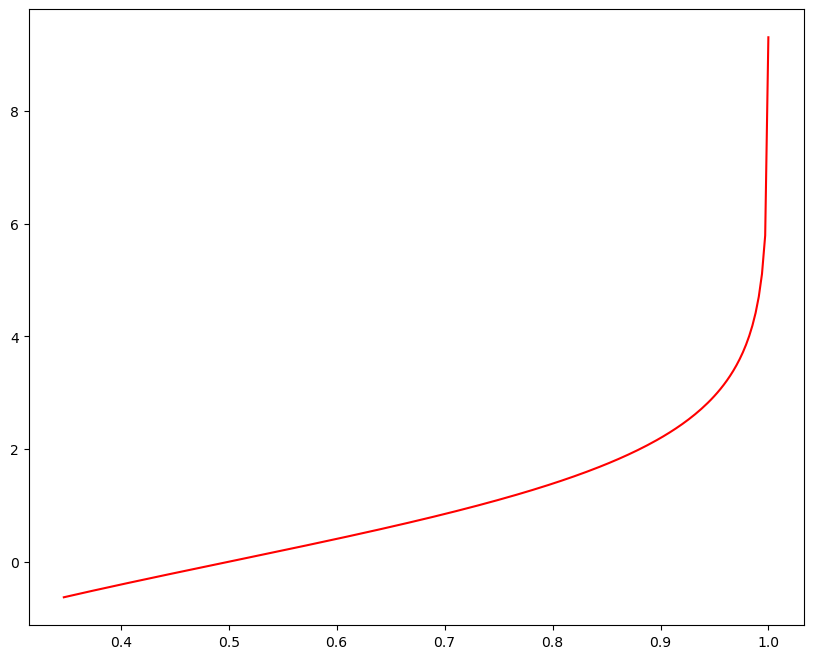

In [52]:
logito = np.log(p/(1-p))

plt.plot(p, logito, "r")

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [37]:
# 2.1: Categorize a variável em 5 grupos

df["nivel_idade"] = ""

In [38]:
# 2.1: Categorize a variável em 5 grupos

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,nivel_idade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,


In [39]:
# 2.1: Categorize a variável em 5 grupos

print("- 0 a 12 anos: Criança")
print("- 13 a 17 anos: Adolescente")
print("- 18 a 40 anos: Adulto")
print("- 41 a 55 anos: Melhor idade")
print("- 56 a 100 anos: Idoso")

- 0 a 12 anos: Criança
- 13 a 17 anos: Adolescente
- 18 a 40 anos: Adulto
- 41 a 55 anos: Melhor idade
- 56 a 100 anos: Idoso


In [40]:
# 2.1: Categorize a variável em 5 grupos

df.age.describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [41]:
# 2.1: Categorize a variável em 5 grupos

df.loc[(df["age"] >= 0) & (df["age"] <= 12), "nivel_idade"] = "Criança"
df.loc[(df["age"] >= 13) & (df["age"] <= 17), "nivel_idade"] = "Adolescente"
df.loc[(df["age"] >= 18) & (df["age"] <= 40), "nivel_idade"] = "Adulto"
df.loc[(df["age"] >= 41) & (df["age"] <= 55), "nivel_idade"] = "Melhor idade"
df.loc[(df["age"] >= 56) & (df["age"] <= 100), "nivel_idade"] = "Idoso"

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,nivel_idade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,Idoso
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,Idoso
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,Idoso
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,Adulto
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,Melhor idade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,Melhor idade
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,Idoso
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,Idoso
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,Idoso


In [42]:
# 2.1: Categorize a variável em 5 grupos

biv_age = pd.crosstab(df["age"], df["nivel_idade"], margins=True)
biv_age

nivel_idade,Adulto,Idoso,Melhor idade,All
age,,,,
29.0,1,0,0,1
34.0,2,0,0,2
35.0,4,0,0,4
37.0,2,0,0,2
38.0,2,0,0,2
39.0,4,0,0,4
40.0,3,0,0,3
41.0,0,0,10,10
42.0,0,0,8,8


In [43]:
# 2.2: Calcule as mesmas quantidades calculadas no execício anterior
print("De acordo com a categorização temos: ")
print("")
print("18 pessoas adultas")
print("152 pessoas idosas")
print("133 pessoas da melhor idade")

De acordo com a categorização temos: 

18 pessoas adultas
152 pessoas idosas
133 pessoas da melhor idade


In [44]:
# 2.2: Calcule as mesmas quantidades calculadas no execício anterior
# 2: Quantidade média 

biv_age["Quantidade_media_adulto"] = biv_age["Adulto"]/biv_age["All"]
biv_age["Quantidade_media_idoso"] = biv_age["Idoso"]/biv_age["All"]
biv_age["Quantidade_media_melhor_idade"] = biv_age["Melhor idade"]/biv_age["All"]
biv_age

nivel_idade,Adulto,Idoso,Melhor idade,All,Quantidade_media_adulto,Quantidade_media_idoso,Quantidade_media_melhor_idade
age,,,,,,,
29.0,1,0,0,1,1.000000,0.00000,0.000000
34.0,2,0,0,2,1.000000,0.00000,0.000000
35.0,4,0,0,4,1.000000,0.00000,0.000000
37.0,2,0,0,2,1.000000,0.00000,0.000000
38.0,2,0,0,2,1.000000,0.00000,0.000000
39.0,4,0,0,4,1.000000,0.00000,0.000000
40.0,3,0,0,3,1.000000,0.00000,0.000000
41.0,0,0,10,10,0.000000,0.00000,1.000000
42.0,0,0,8,8,0.000000,0.00000,1.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='All', ylabel='count'>

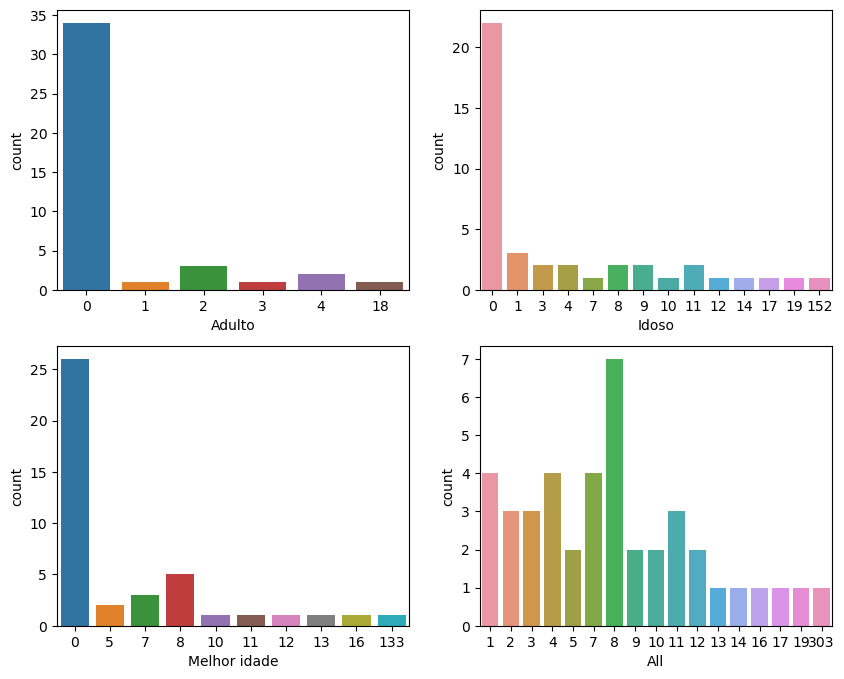

In [45]:
plt.rc("figure", figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x="Adulto", data=biv_age)
sns.countplot(ax = axes[0, 1], x="Idoso", data=biv_age)
sns.countplot(ax = axes[1, 0], x="Melhor idade", data=biv_age)
sns.countplot(ax = axes[1, 1], x="All", data=biv_age)